In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 先理解多项式

In [2]:
x = np.arange(10000)

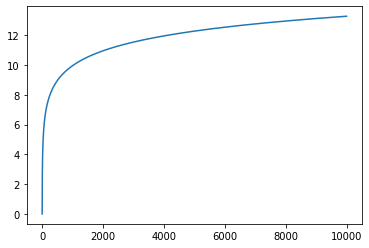

In [3]:
plt.plot(np.log2(x))

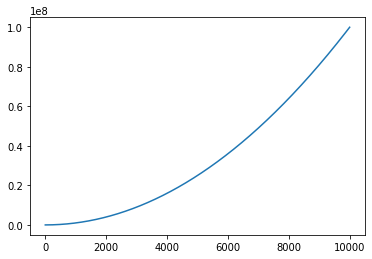

In [4]:
plt.plot(x**2)

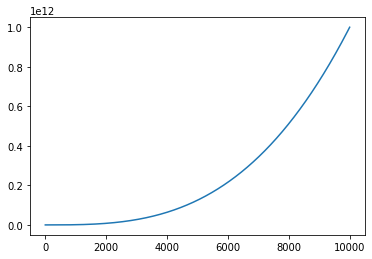

In [5]:
plt.plot(x**2+x**3)

In [6]:
def standarize(X):
    '''
    特征标准化处理：
    Args:
       X 样本集
    Returns:
      标准后的样本集
    '''
    m, n = X.shape #m是行，n是列
    values = {}  # 保存每一列的mean和std，便于对预测数据进行标准化
    for j in range(n):
        features = X[:,j] #分别拿出每一列的特征值
        meanVal = features.mean(axis=0) #特征值的均值
        stdVal = features.std(axis=0) #特征值的标准差
        print("特征值"+str(j),features,'特征值的均值',meanVal,'特征值的标准差',stdVal)
        values[j] = [meanVal, stdVal] 
        if stdVal != 0: #如果标准差不等于0就把数据归一化
            X[:,j] = (features - meanVal) / stdVal #数据归一化
        else: #要不就直接=0
            X[:,j] = 0
    return X, values
    

In [7]:
import numpy as np
import matplotlib.pyplot as plt

srcX = np.array([[62.47, 2.0], [65.78, 3.0], [58.05, 2.0], [52.09, 2.0], [74.98, 3.0], [55.87, 2.0], [90.66, 3.0], [113.68, 3.0], [97.92, 2.0], [46.33, 2.0], [134.55, 3.0], [151.15, 3.0], [63.01, 2.0], [65.66, 2.0], [108.81, 3.0], [66.19, 3.0], [54.1, 2.0], [73.44, 2.0], [51.78, 2.0], [92.42, 3.0], [59.13, 2.0], [49.49, 1.0], [51.68, 2.0], [52.87, 2.0], [69.46, 2.0], [76.41, 2.0], [63.1, 2.0], [197.37, 5.0], [93.53, 3.0], [91.35, 3.0], [103.49, 3.0], [45.12, 2.0], [59.59, 2.0], [174.66, 4.0], [35.8, 1.0], [91.35, 3.0], [55.07, 2.0], [119.44, 3.0], [65.85, 2.0], [72.05, 3.0], [85.98, 3.0], [103.29, 4.0], [184.05, 5.0], [90.87, 3.0], [38.83, 1.0], [51.65, 1.0], [50.14, 1.0]])
srcY = np.array([[213.0], [226.0], [179.0], [188.0], [215.0], [152.0], [290.0], [375.0], [305.0], [166.0], [385.0], [500.0], [195.0], [200.0], [310.0], [205.0], [158.0], [270.0], [150.0], [310.0], [180.0], [200.0], [155.0], [178.0], [303.0], [250.0], [218.0], [630.0], [326.0], [310.0], [530.0], [138.0], [230.0], [560.0], [115.0], [400.0], [140.0], [547.0], [240.0], [250.0], [315.0], [330.0], [680.0], [302.0], [130.0], [162.0], [140.0]])

def normalized(X):
    m, n = X.shape 
    values = {}
    for j in range(n):
        features = X[:,j]
        meanVal = features.mean(axis=0)
        stdVal = features.std(axis=0)
        values[j] = [meanVal, stdVal]
        if stdVal != 0:
            X[:,j] = (features - meanVal) / stdVal #数据归一化
        else: #要不就直接=0
            X[:,j] = 0
        return X, values

def data_processing(X):
    normalizedX ,normalizedValue = standarize(X)
    newX = np.c_[np.ones(srcX.shape[0]),normalizedX]
    theta = np.ones(newX.shape[-1])
    return newX,theta,normalizedValue

def h(x,w):
    return np.dot(x,w)

def loss(x,y,w):
    m = x.shape[0]
    return ((h(x,theta)-y)**2).sum()/(2*m)

In [8]:
newX,theta,normalizedValue = data_processing(srcX)

特征值0 [ 62.47  65.78  58.05  52.09  74.98  55.87  90.66 113.68  97.92  46.33
 134.55 151.15  63.01  65.66 108.81  66.19  54.1   73.44  51.78  92.42
  59.13  49.49  51.68  52.87  69.46  76.41  63.1  197.37  93.53  91.35
 103.49  45.12  59.59 174.66  35.8   91.35  55.07 119.44  65.85  72.05
  85.98 103.29 184.05  90.87  38.83  51.65  50.14] 特征值的均值 81.07574468085106 特征值的标准差 36.96655980199384
特征值1 [2. 3. 2. 2. 3. 2. 3. 3. 2. 2. 3. 3. 2. 2. 3. 3. 2. 2. 2. 3. 2. 1. 2. 2.
 2. 2. 2. 5. 3. 3. 3. 2. 2. 4. 1. 3. 2. 3. 2. 3. 3. 4. 5. 3. 1. 1. 1.] 特征值的均值 2.4680851063829787 特征值的标准差 0.895641071482944


In [9]:
newX[:10]

array([[ 1.        , -0.50331285, -0.52262577],
       [ 1.        , -0.41377247,  0.59389292],
       [ 1.        , -0.62288038, -0.52262577],
       [ 1.        , -0.78410717, -0.52262577],
       [ 1.        , -0.16489889,  0.59389292],
       [ 1.        , -0.68185259, -0.52262577],
       [ 1.        ,  0.25926825,  0.59389292],
       [ 1.        ,  0.88199323,  0.59389292],
       [ 1.        ,  0.45566197, -0.52262577],
       [ 1.        , -0.93992367, -0.52262577]])

In [10]:
srcY[:10]

array([[213.],
       [226.],
       [179.],
       [188.],
       [215.],
       [152.],
       [290.],
       [375.],
       [305.],
       [166.]])

In [11]:
m,n =  newX.shape
theta = np.zeros((n,1))
loss(newX,srcY,theta)

47250.77659574468

In [12]:
#alpha, x, y, maxloop, epsilon = 1,newX,srcY,5000,0.000001

In [13]:
alpha = 1 # 学习率
maxloop = 5000 # 最大迭代次数
epsilon = 0 # 收敛精度值
x = newX
y = srcY

In [14]:


costs = [loss(x,y,theta)]
losslog = [loss(x,y,theta)]


for i in range(maxloop):
    theta = theta - alpha * 1.0 / m * np.dot(x.T,(h(x,theta)-y))
    #print(i,theta)
    cost = loss(x,y,theta)
    #print(cost)
    costs.append(cost)
    lossvar = abs(costs[-2]-costs[-1])
    losslog.append(lossvar)
    
    if lossvar <= epsilon or np.isinf(lossvar) or np.isnan(lossvar):   
        break
    else:
     
        continue


133 0.0
133


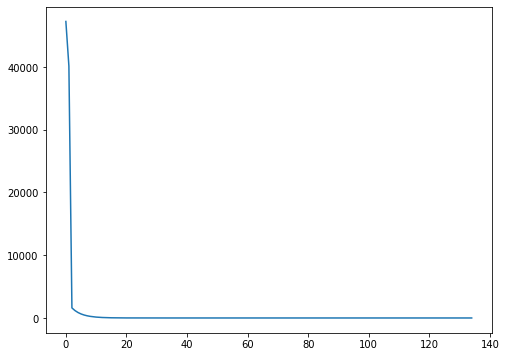

In [15]:
errorsFig = plt.figure(figsize=(8,6))
print(i,lossvar )
print(i) 
plt.plot(range(len(losslog)),losslog)

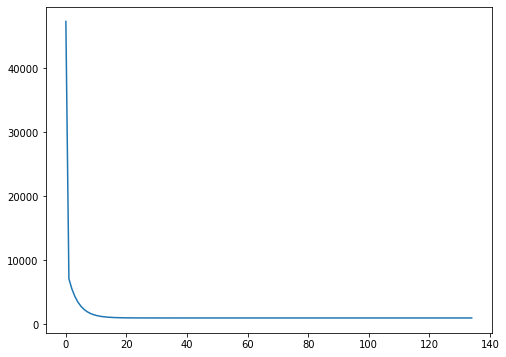

In [16]:
errorsFig = plt.figure(figsize=(8,6))
plt.plot(range(len(costs)),costs)

In [17]:
theta

array([[275.55319149],
       [125.49090892],
       [  3.76670058]])

In [18]:
losslog[-10:]

[7.958078640513122e-13,
 2.2737367544323206e-13,
 2.2737367544323206e-13,
 2.2737367544323206e-13,
 3.410605131648481e-13,
 1.1368683772161603e-13,
 3.410605131648481e-13,
 5.684341886080801e-13,
 1.1368683772161603e-13,
 0.0]

In [19]:
costs[:10],costs[-10:]

([47250.77659574468,
  7115.266326086187,
  5513.13487185973,
  4330.663689355225,
  3457.927501719038,
  2813.7947190523982,
  2338.385256738654,
  1987.5039432278404,
  1728.5320338933516,
  1537.3948965140366],
 [998.8303191951856,
  998.8303191951858,
  998.8303191951856,
  998.8303191951858,
  998.8303191951854,
  998.8303191951856,
  998.8303191951859,
  998.8303191951853,
  998.8303191951854,
  998.8303191951854])